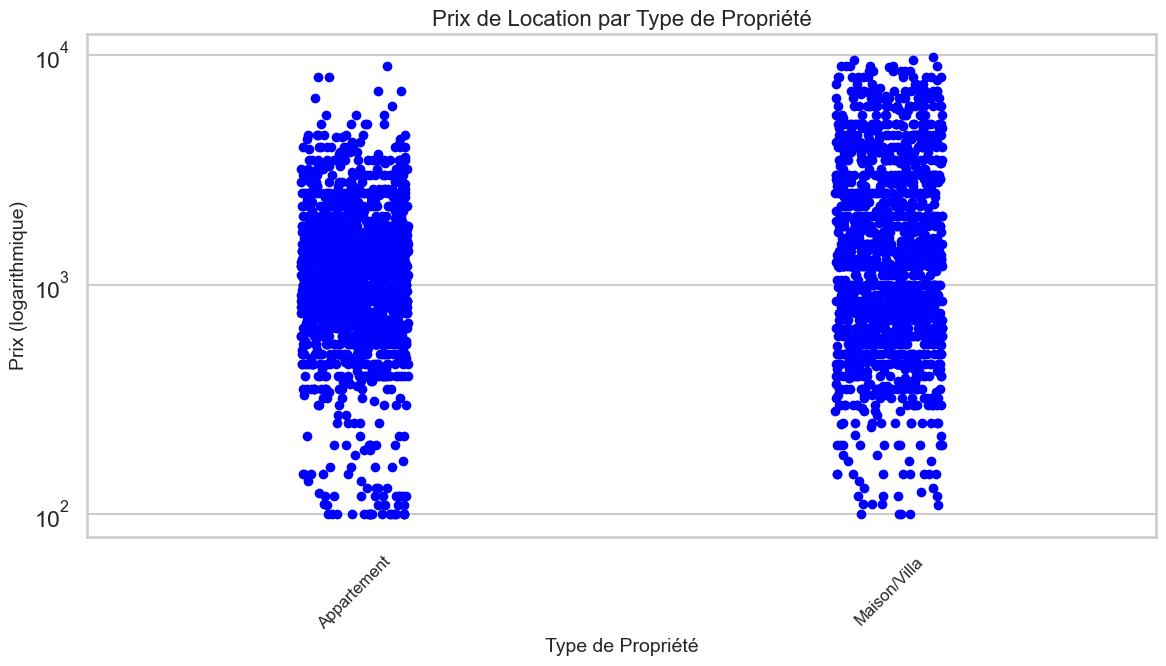

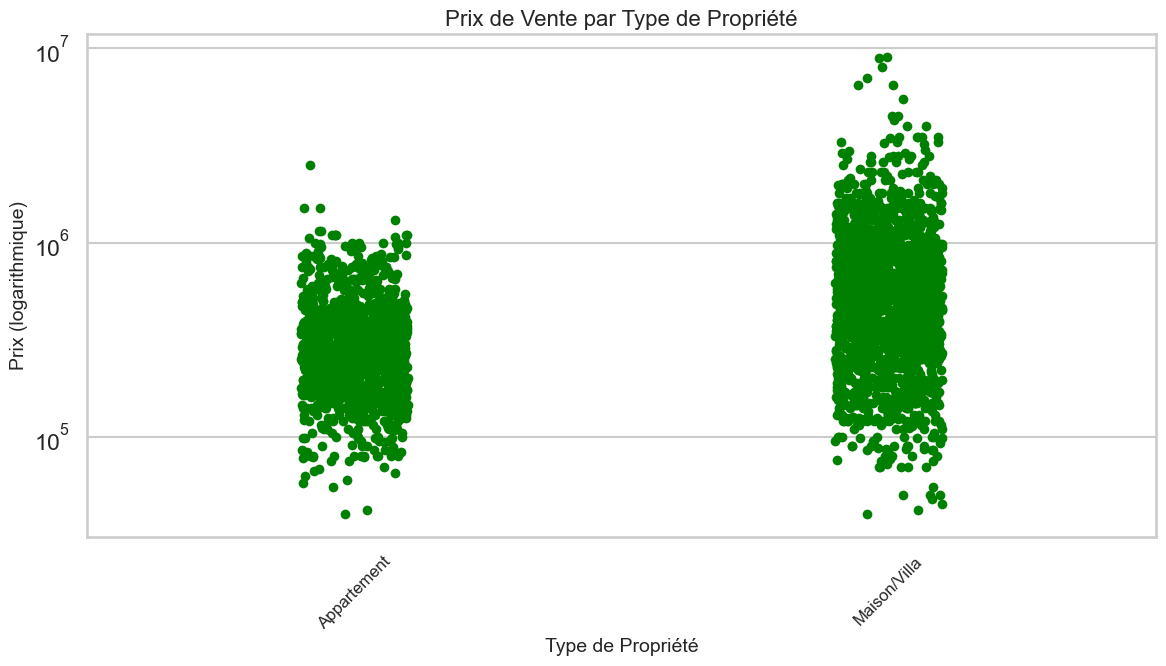

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('cleaned_final_version.csv')

# Séparer les données en deux parties
data_rent = data_cleaned[data_cleaned['Transaction Type'] == 'rent']  
data_sale = data_cleaned[data_cleaned['Transaction Type'] == 'sale']  

sns.set_style("whitegrid")
sns.set_context("talk")

# Visualisation pour les prix de location
plt.figure(figsize=(12, 7))
sns.stripplot(data=data_rent, x='Property Type', y='Price', color='blue', size=7, jitter=True)  
plt.yscale('log')  
plt.title('Prix de Location par Type de Propriété', fontsize=16)
plt.xlabel('Type de Propriété', fontsize=14)
plt.ylabel('Prix (logarithmique)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualisation pour les prix de vente
plt.figure(figsize=(12, 7))
sns.stripplot(data=data_sale, x='Property Type', y='Price', color='green', size=7, jitter=True)  
plt.yscale('log')  
plt.title('Prix de Vente par Type de Propriété', fontsize=16)
plt.xlabel('Type de Propriété', fontsize=14)
plt.ylabel('Prix (logarithmique)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


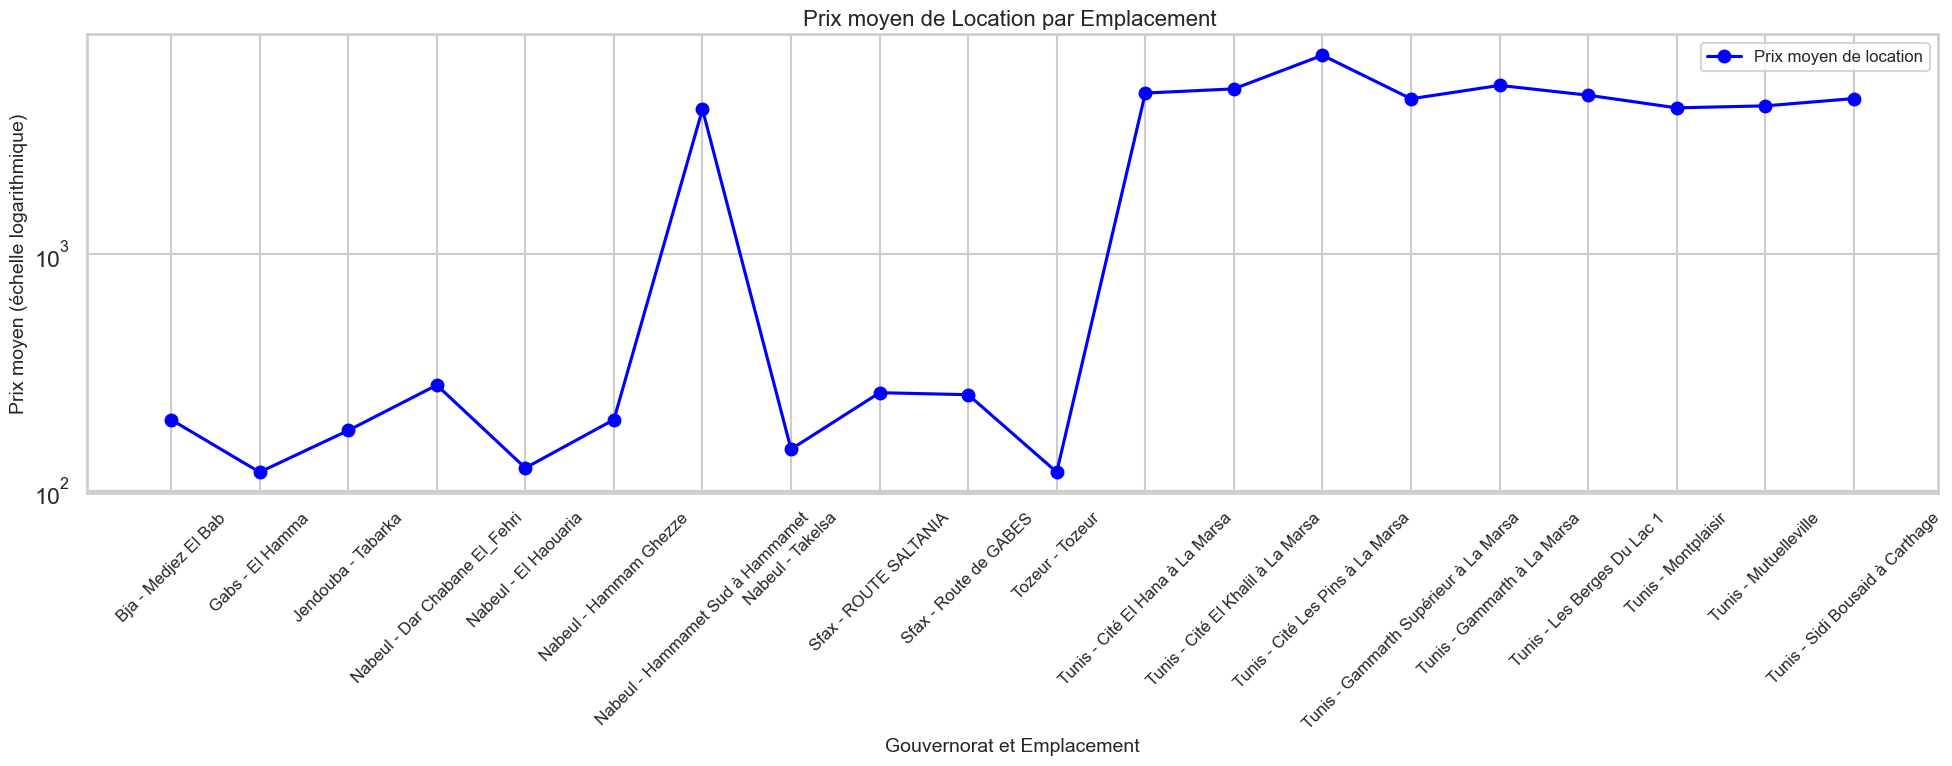

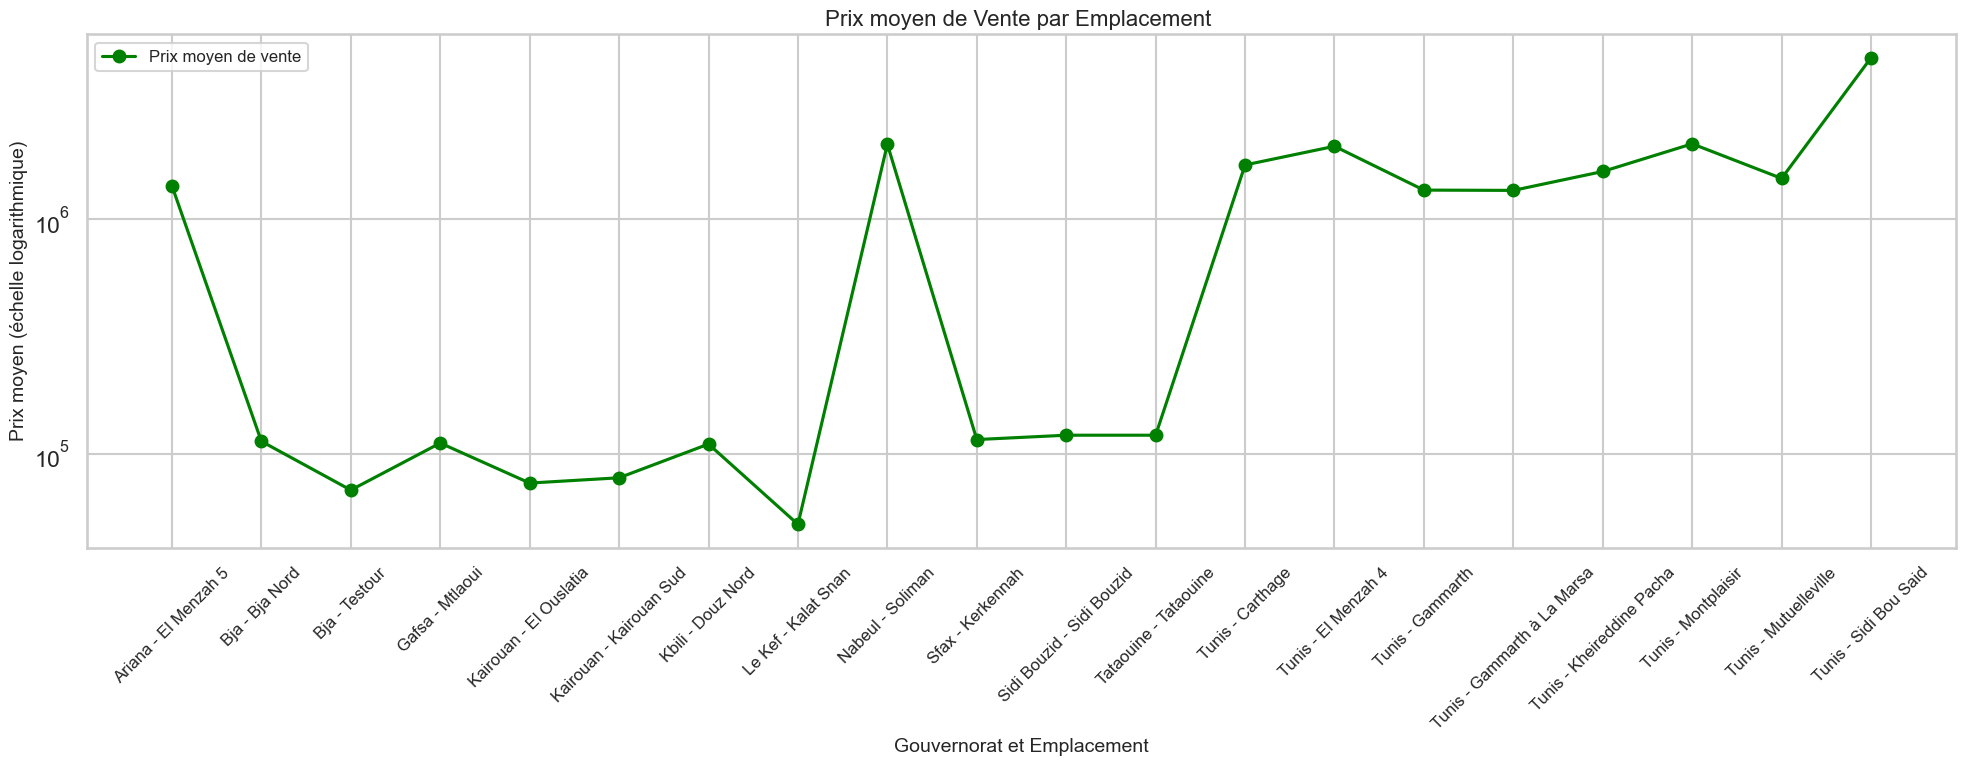

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('cleaned_final_version.csv')


data_cleaned['Location_Combined'] = data_cleaned['Governorate'] + ' - ' + data_cleaned['Location']

# Séparer les données pour les transactions Rent et Sale
data_rent = data_cleaned[data_cleaned['Transaction Type'] == 'rent']  
data_sale = data_cleaned[data_cleaned['Transaction Type'] == 'sale'] 

# Calculer les prix moyens par emplacement pour Rent
location_avg_rent = (
    data_rent.groupby('Location_Combined')['Price']
    .mean()
    .sort_values()
)

# Calculer les prix moyens par emplacement pour Sale
location_avg_sale = (
    data_sale.groupby('Location_Combined')['Price']
    .mean()
    .sort_values()
)

top_rent_locations = location_avg_rent.tail(10).index
bottom_rent_locations = location_avg_rent.head(10).index
selected_rent_locations = top_rent_locations.union(bottom_rent_locations)

top_sale_locations = location_avg_sale.tail(10).index
bottom_sale_locations = location_avg_sale.head(10).index
selected_sale_locations = top_sale_locations.union(bottom_sale_locations)

# Visualisation des prix de location 
plt.figure(figsize=(20, 8))
plt.plot(
    location_avg_rent.loc[selected_rent_locations].index,
    location_avg_rent.loc[selected_rent_locations].values,
    marker='o',
    color='blue',
    label='Prix moyen de location'
)
plt.yscale('log')  
plt.title('Prix moyen de Location par Emplacement ', fontsize=16)
plt.xlabel('Gouvernorat et Emplacement', fontsize=14)
plt.ylabel('Prix moyen (échelle logarithmique)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Visualisation des prix de vente 
plt.figure(figsize=(20, 8))
plt.plot(
    location_avg_sale.loc[selected_sale_locations].index,
    location_avg_sale.loc[selected_sale_locations].values,
    marker='o',
    color='green',
    label='Prix moyen de vente'
)
plt.yscale('log')  
plt.title('Prix moyen de Vente par Emplacement ', fontsize=16)
plt.xlabel('Gouvernorat et Emplacement', fontsize=14)
plt.ylabel('Prix moyen (échelle logarithmique)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


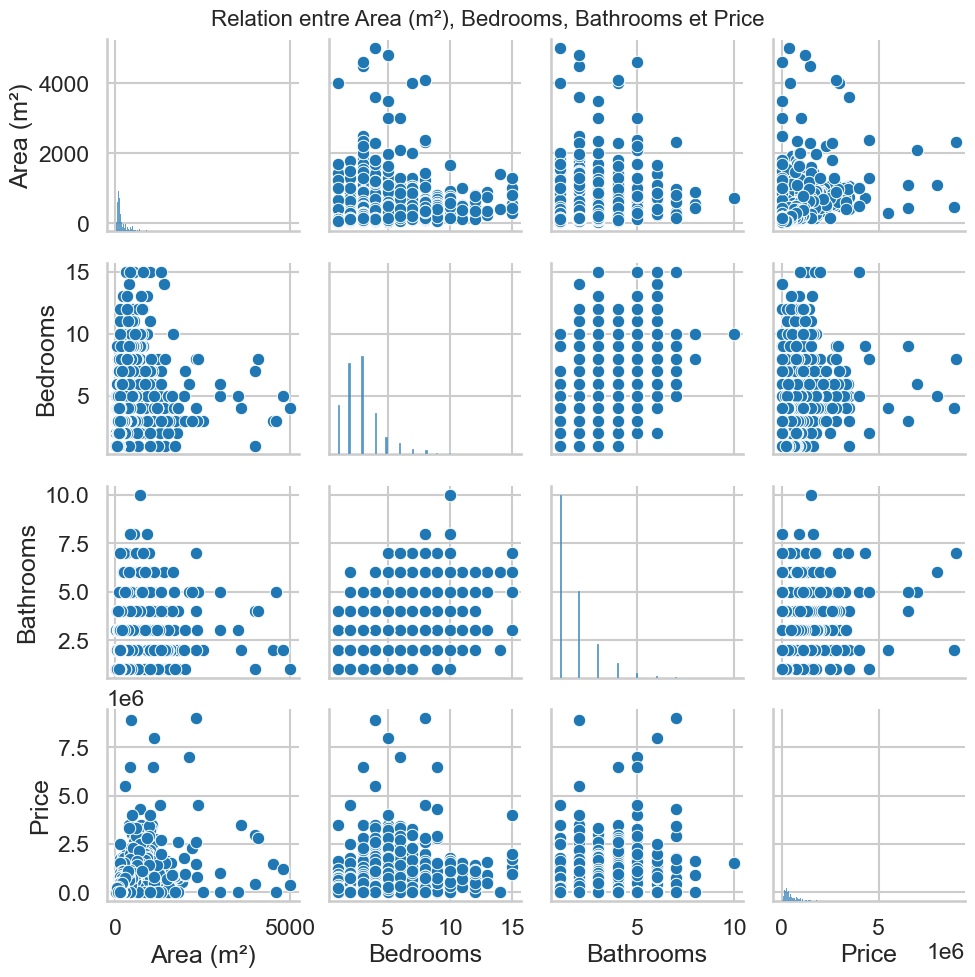

In [ ]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

data_cleaned = pd.read_csv('cleaned_final_version.csv')

columns_of_interest = ['Area (m²)', 'Bedrooms', 'Bathrooms', 'Price']

data_cleaned_filtered = data_cleaned.dropna(subset=columns_of_interest)

# Créer le pairplot avec les données filtrées
sns.pairplot(data_cleaned_filtered[columns_of_interest])
plt.suptitle("Relation entre Area (m²), Bedrooms, Bathrooms et Price", fontsize=16)
plt.subplots_adjust(top=0.95)  
plt.show()


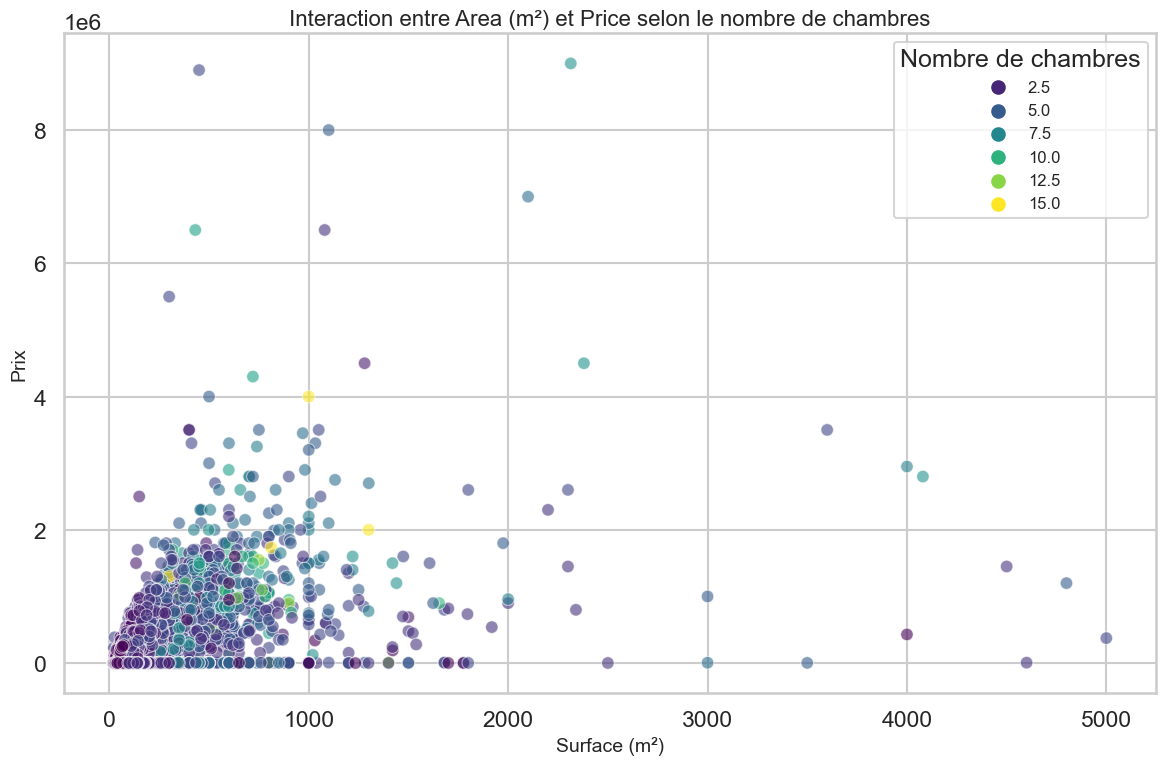

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('cleaned_final_version.csv')

data_cleaned_filtered = data_cleaned.dropna(subset=['Area (m²)', 'Bedrooms', 'Price'])

plt.figure(figsize=(12, 8))

sns.scatterplot(data=data_cleaned_filtered, x='Area (m²)', y='Price', hue='Bedrooms', palette='viridis', alpha=0.6)

# Ajouter des titres et des labels
plt.title('Interaction entre Area (m²) et Price selon le nombre de chambres', fontsize=16)
plt.xlabel('Surface (m²)', fontsize=14)
plt.ylabel('Prix', fontsize=14)

plt.legend(title='Nombre de chambres', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


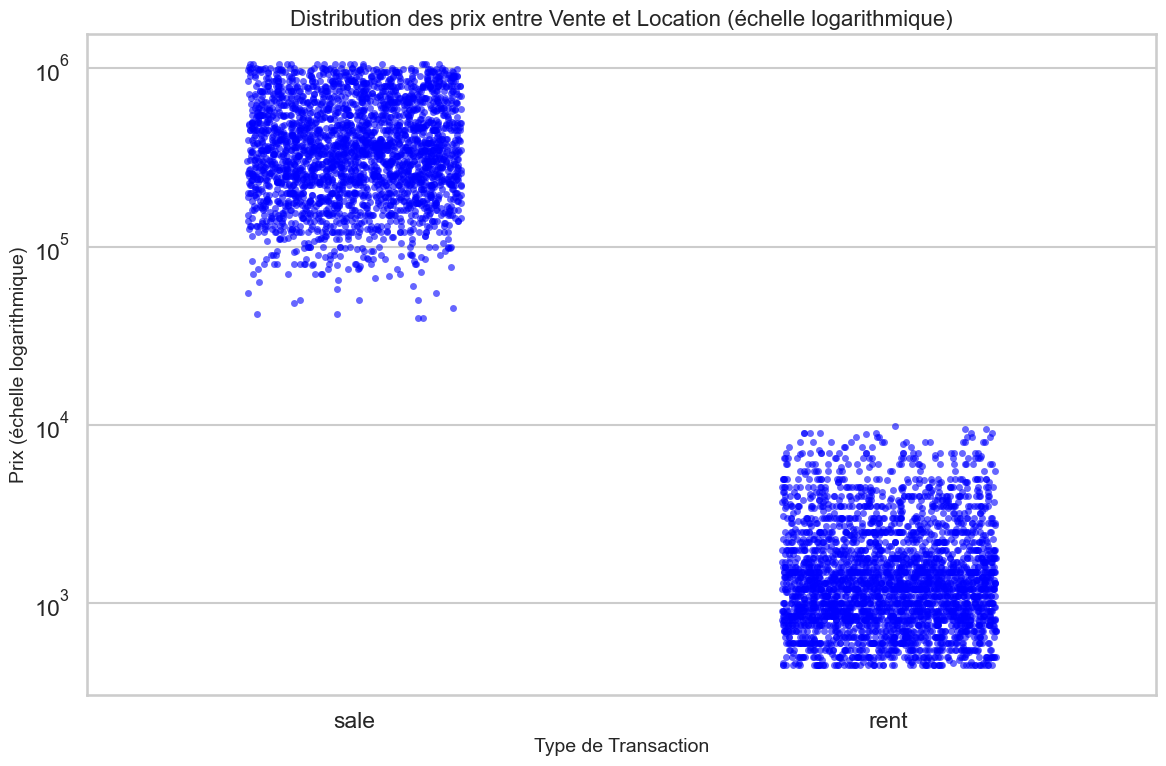

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('cleaned_final_version.csv')

data_cleaned_filtered = data_cleaned.dropna(subset=['Price', 'Transaction Type'])

low, high = data_cleaned_filtered['Price'].quantile([0.05, 0.95])
data_cleaned_filtered = data_cleaned_filtered[(data_cleaned_filtered['Price'] >= low) & 
                                              (data_cleaned_filtered['Price'] <= high)]

# Créer une figure
plt.figure(figsize=(12, 8))

sns.stripplot(
    x='Transaction Type', 
    y='Price', 
    data=data_cleaned_filtered, 
    color='blue', 
    alpha=0.6, 
    jitter=0.2
)

plt.yscale('log')

plt.title('Distribution des prix entre Vente et Location (échelle logarithmique)', fontsize=16)
plt.xlabel('Type de Transaction', fontsize=14)
plt.ylabel('Prix (échelle logarithmique)', fontsize=14)

plt.tight_layout()

# Afficher le graphique
plt.show()
